In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps
import matplotlib as mpl

[[37.35 73.45 28.349999999999998 56.13]
 [44.36 84.11 31.86 67.58]
 [44.36 85.04 34.760000000000005 72.34]
 [49.7 90.7 36.13 82.43]
 [62.96000000000001 94.77 39.33 91.14999999999999]
 [71.19 94.39 39.33 93.89]
 [80.64 94.56 39.629999999999995 93.28999999999999]]


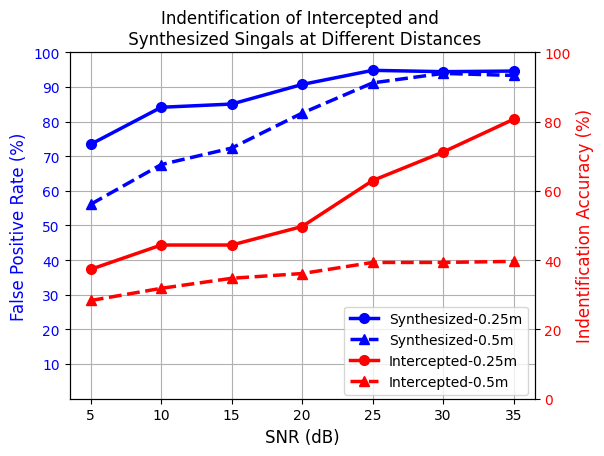

In [69]:
reader=pd.read_excel('./checkpoint2/results/SDR_test.xlsx')
cols=reader.keys()
snrs = np.array(reader[cols[0]][93:100])
results = 100*np.array(reader[cols[1:5]][93:100])
print(results)

markers=['o', '^'] # 0.25, 0.5 
colors=['b', 'r'] # real, fake
fig, ax1 = plt.subplots(figsize=(6,4.5))

ax1.plot(snrs, results[:,1], marker=markers[0], color=colors[0], label='Synthesized-0.25m', linewidth=2.5, markersize=7)
ax1.plot(snrs, results[:,3], marker=markers[1], color=colors[0], linestyle='--', label='Synthesized-0.5m', linewidth=2.5, markersize=7)

ax1.set_ylim([0, 100])
ax1.tick_params(axis='y', labelcolor=colors[0])
ax1.set_xlabel("SNR (dB)", fontsize=12)
ax1.set_ylabel("False Positive Rate (%)", color=colors[0], fontsize=12)
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100])
ax1.set_title("Indentification of Intercepted and \n Synthesized Singals at Different Distances")
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.plot(snrs, results[:,0], marker=markers[0], color=colors[1], label='Intercepted-0.25m', linewidth=2.5, markersize=7)
ax1.plot(snrs, results[:,2], marker=markers[1], color=colors[1], linestyle='--', label='Intercepted-0.5m', linewidth=2.5, markersize=7)
ax2.set_ylabel('Indentification Accuracy (%)', color=colors[1], fontsize=12) 

ax2.tick_params(axis='y', labelcolor=colors[1])
ax2.set_ylim([0,100])

fig.legend(bbox_to_anchor=(0.9, 0.33))

plt.savefig("./checkpoint2/results/figure/sdr_distances.pdf", format="pdf", bbox_inches="tight")
plt.show()

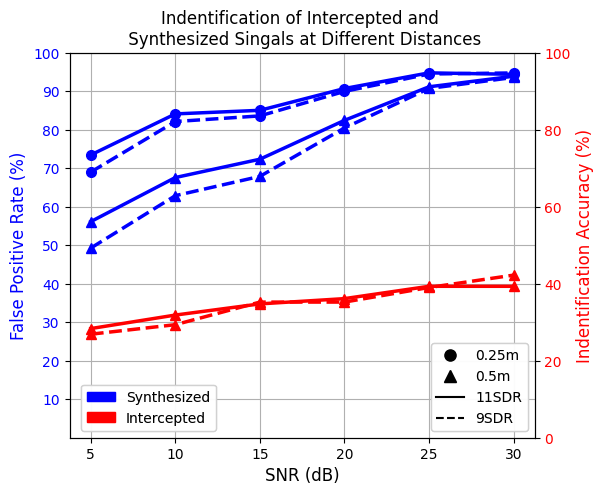

In [60]:
import matplotlib.patches as mpatches
reader=pd.read_excel('./checkpoint2/results/SDR_test.xlsx')
cols=reader.keys()
snrs = np.array(reader[cols[0]][93:99])
results11 = 100*np.array(reader[cols[1:5]][93:99])
results9 = 100*np.array(reader[cols[1:5]][104:110])

markers_dis=['o', '^'] # 0.25, 0.5 
colors_types=['b', 'r'] # fake, real
linestyles_nsdr=['-', '--'] # 11, 9
dis=[0.25, 0.5]
types=['Synthesized', 'Intercepted']
nsdr=[11,9]
fig, ax1 = plt.subplots(figsize=(6,5))

ax1.plot(snrs, results11[:,1], marker=markers_dis[0], color=colors_types[0], linestyle=linestyles_nsdr[0], linewidth=2.5, markersize=7)
ax1.plot(snrs, results11[:,3], marker=markers_dis[1], color=colors_types[0], linestyle=linestyles_nsdr[0], linewidth=2.5, markersize=7)
ax1.plot(snrs, results9[:,1], marker=markers_dis[0], color=colors_types[0], linestyle=linestyles_nsdr[1], linewidth=2.5, markersize=7)
ax1.plot(snrs, results9[:,3], marker=markers_dis[1], color=colors_types[0], linestyle=linestyles_nsdr[1], linewidth=2.5, markersize=7)

ax1.set_ylim([0, 100])
ax1.tick_params(axis='y', labelcolor=colors_types[0])
ax1.set_xlabel("SNR (dB)", fontsize=12)
ax1.set_ylabel("False Positive Rate (%)", color=colors_types[0], fontsize=12)
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100])
ax1.set_title("Indentification of Intercepted and \n Synthesized Singals at Different Distances")
ax1.grid()

ax2 = ax1.twinx()  
# ax1.plot(snrs, results11[:,0], marker=markers_dis[0], color=colors_types[1], linestyle=linestyles_nsdr[0], linewidth=2.5, markersize=7)
ax1.plot(snrs, results11[:,2], marker=markers_dis[1], color=colors_types[1], linestyle=linestyles_nsdr[0], linewidth=2.5, markersize=7)
# ax1.plot(snrs, results9[:,0], marker=markers_dis[0], color=colors_types[1], linestyle=linestyles_nsdr[1], linewidth=2.5, markersize=7)
ax1.plot(snrs, results9[:,2], marker=markers_dis[1], color=colors_types[1], linestyle=linestyles_nsdr[1], linewidth=2.5, markersize=7)
ax2.set_ylabel('Indentification Accuracy (%)', color=colors_types[1], fontsize=12) 

ax2.tick_params(axis='y', labelcolor=colors_types[1])
ax2.set_ylim([0,100])

patches1 = [mpatches.Patch(color=colors_types[i], label='{}'.format(types[i])) for i in range(len(colors_types))]
patches2 = [ plt.plot([],[], color='black', marker=markers_dis[i], ms=8, ls="", mec=None, label="{}m".format(dis[i]))[0]  for i in range(len(dis))]
patches2 += [plt.plot([],[], color='black', linestyle=linestyles_nsdr[i], ms=8, mec=None, label="{}SDR".format(nsdr[i]))[0]  for i in range(len(types))]

legend1=fig.legend(handles=patches1, bbox_to_anchor=(0.38, 0.23))
legend2=fig.legend(handles=patches2, bbox_to_anchor=(0.9, 0.313))
ax1.add_artist(legend1)
ax1.add_artist(legend2)

plt.savefig("./checkpoint2/results/figure/sdr_distances_9_11.svg", bbox_inches="tight")
plt.show()

[[85.45 87.4]
 [85.87 89.27000000000001]
 [86.1 89.39]
 [87.88 92.03]
 [88.19 92.19000000000001]
 [92.25999999999999 92.89]
 [93.06 93.91000000000001]]


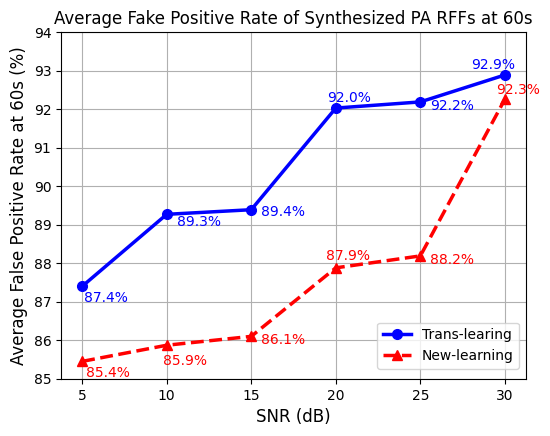

In [52]:
reader=pd.read_excel('./checkpoint2/results/PA_test.xlsx')
cols=reader.keys()
SNRs = np.array(reader[cols[0]][:7])
results = 100*np.array(reader[cols[1:3]][:7])
notrans = results[:,0]
trans = results[:,1]
print(results)

markers=['o', '^'] # 0.25, 0.5 
colors=['b', 'r'] # real, fake
fig, ax1 = plt.subplots(figsize=(6,4.5))

ax1.plot(SNRs[:-1], trans[:-1], marker=markers[0], color=colors[0], label='Trans-learing', linewidth=2.5, markersize=7)
ax1.plot(SNRs[:-1], notrans[:-1], marker=markers[1], color=colors[1], linestyle='--', label='New-learning', linewidth=2.5, markersize=7)

p=1
ax1.text(x=SNRs[0]+0.1, y=trans[0]-0.4, s='{}%'.format(np.round(trans[0],p)), color=colors[0]) 
ax1.text(x=SNRs[1]+0.6, y=trans[1]-0.3, s='{}%'.format(np.round(trans[1],p)), color=colors[0])   
ax1.text(x=SNRs[2]+0.6, y=trans[2]-0.15, s='{}%'.format(np.round(trans[2],p)), color=colors[0])  
ax1.text(x=SNRs[3]-0.5, y=trans[3]+0.15, s='{}%'.format(np.round(trans[3],p)), color=colors[0])  
ax1.text(x=SNRs[4]+0.6, y=trans[4]-0.2, s='{}%'.format(np.round(trans[4],p)), color=colors[0]) 
ax1.text(x=SNRs[5]-2, y=trans[5]+0.15, s='{}%'.format(np.round(trans[5],p)), color=colors[0]) 

ax1.text(x=SNRs[0]+0.2, y=notrans[0]-0.4, s='{}%'.format(np.round(notrans[0],p)), color=colors[1]) 
ax1.text(x=SNRs[1]-0.2, y=notrans[1]-0.5, s='{}%'.format(np.round(notrans[1],p)), color=colors[1])   
ax1.text(x=SNRs[2]+0.6, y=notrans[2]-0.2, s='{}%'.format(np.round(notrans[2],p)), color=colors[1])  
ax1.text(x=SNRs[3]-0.6, y=notrans[3]+0.2, s='{}%'.format(np.round(notrans[3],p)), color=colors[1])  
ax1.text(x=SNRs[4]+0.6, y=notrans[4]-0.2, s='{}%'.format(np.round(notrans[4],p)), color=colors[1]) 
ax1.text(x=SNRs[5]-0.5, y=notrans[5]+0.15, s='{}%'.format(np.round(notrans[5],p)), color=colors[1]) 

ax1.set_ylim([85, 94])
ax1.tick_params(axis='y')
ax1.set_xlabel("SNR (dB)", fontsize=12)
ax1.set_ylabel("Average False Positive Rate at 60s (%)", fontsize=12)
ax1.set_yticks([85, 86, 87, 88, 89, 90, 91, 92, 93, 94,])
ax1.set_title("Average Fake Positive Rate of Synthesized PA RFFs at 60s")
ax1.grid()

fig.legend(bbox_to_anchor=(0.9, 0.25))

plt.savefig("./checkpoint2/results/figure/pa_fpr60s_p"+str(p)+".svg", bbox_inches="tight")
plt.show()

[90.7 83.58363636363634 80.18454545454546] [94.525 84.71 54.735]


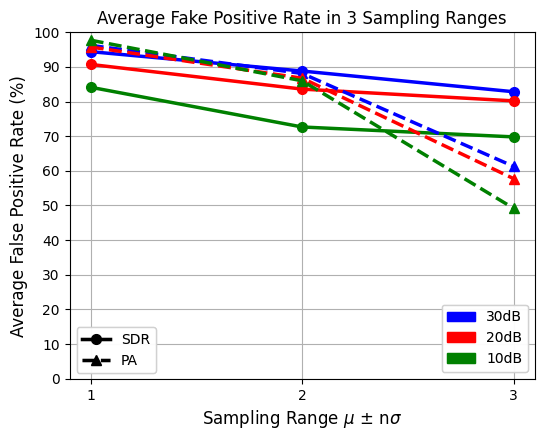

In [104]:
reader_pa=pd.read_excel('./checkpoint2/results/PA_test.xlsx')
reader_sdr=pd.read_excel('./checkpoint2/results/SDR_test.xlsx')
cols_sdr=reader_sdr.keys()
cols_pa=reader_pa.keys()
SNRs = np.array(reader_sdr[cols[0]][222:229])
results_sdr = 100*np.array(reader_sdr[cols_sdr[6:9]][222:229])
results_pa = 100*np.array(reader_pa[cols_pa[1:4]][23:30])

sdr25=results_sdr[3]
pa25=results_pa[2]
print(sdr25, pa25)
sigmas=[1,2,3]
markers_types=['o', '^'] # 0.25, 0.5 
colors_snrs=['b', 'r', 'g'] # real, fake
linestyles_types=['-', '--']
fig, ax1 = plt.subplots(figsize=(6,4.5))

snrs=[30,20,10]
types=['SDR', 'PA']
# for snri in range(len(SNRs)):
#     ax1.plot(sigmas, results_sdr[snri], color=colors[snri], marker=markers[0], label='SDR-{}dB'.format(SNRs[snri]), linewidth=2.5, markersize=7)
# ax1.plot(sigmas, pa25, marker=markers[1], color=colors[1], label='PA', linewidth=2.5, markersize=7)

ax1.plot(sigmas, results_sdr[5], color=colors_snrs[0], marker=markers_types[0], linestyle=linestyles_types[0], label='SDR-{}dB'.format(SNRs[5]), linewidth=2.5, markersize=7)
ax1.plot(sigmas, results_sdr[3], color=colors_snrs[1], marker=markers_types[0], linestyle=linestyles_types[0], label='SDR-{}dB'.format(SNRs[3]), linewidth=2.5, markersize=7)
ax1.plot(sigmas, results_sdr[1], color=colors_snrs[2], marker=markers_types[0], linestyle=linestyles_types[0], label='SDR-{}dB'.format(SNRs[1]), linewidth=2.5, markersize=7)

ax1.plot(sigmas, results_pa[5], color=colors_snrs[0], marker=markers_types[1], linestyle=linestyles_types[1], label='PA-{}dB'.format(SNRs[5]), linewidth=2.5, markersize=7)
ax1.plot(sigmas, results_pa[3], color=colors_snrs[1], marker=markers_types[1], linestyle=linestyles_types[1], label='PA-{}dB'.format(SNRs[3]), linewidth=2.5, markersize=7)
ax1.plot(sigmas, results_pa[1], color=colors_snrs[2], marker=markers_types[1], linestyle=linestyles_types[1], label='PA-{}dB'.format(SNRs[1]), linewidth=2.5, markersize=7)
         

ax1.set_ylim([0, 100])
ax1.set_xticks([1,2,3])
ax1.set_yticks(list(np.arange(0, 101, 10)))
ax1.tick_params(axis='y')
ax1.set_xlabel("Sampling Range $\mu$ \u00B1 n$\sigma$", fontsize=12)
ax1.set_ylabel("Average False Positive Rate (%)", fontsize=12)
# ax1.set_yticks([10,20,30,40,50,60,70,80,90,100])
ax1.set_title("Average Fake Positive Rate in 3 Sampling Ranges")
ax1.grid()

patches1 = [mpatches.Patch(color=colors_snrs[i], label='{}dB'.format(snrs[i])) for i in range(len(snrs))]
patches2 = [ plt.plot([],[], color='black', marker=markers_types[i], ls=linestyles_types[i], linewidth=2.5, markersize=7, mec=None, label="{}".format(types[i]))[0]  for i in range(len(types))]

legend1=fig.legend(handles=patches1, bbox_to_anchor=(0.9, 0.29))
legend2=fig.legend(handles=patches2, bbox_to_anchor=(0.28, 0.24))
ax1.add_artist(legend1)
ax1.add_artist(legend2)

plt.savefig("./checkpoint2/results/figure/pa_sdr_3sigma.svg", format="svg", bbox_inches="tight")
plt.show()

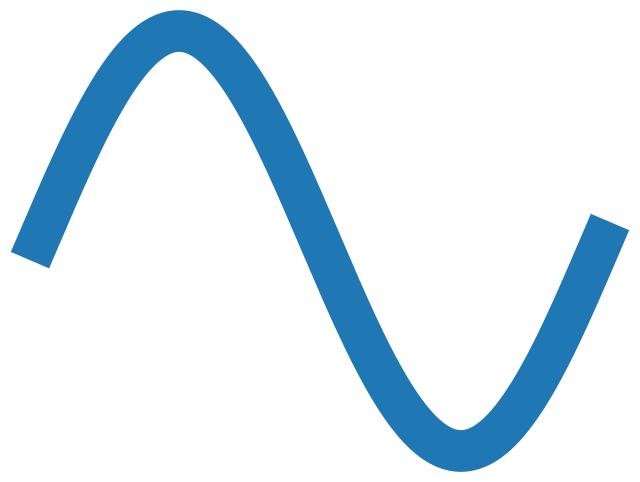

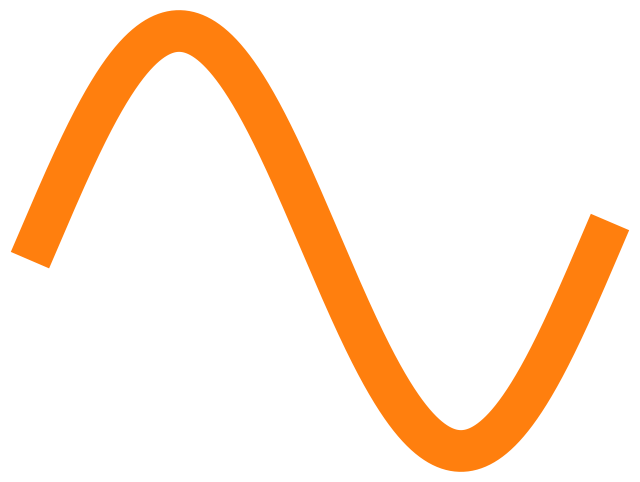

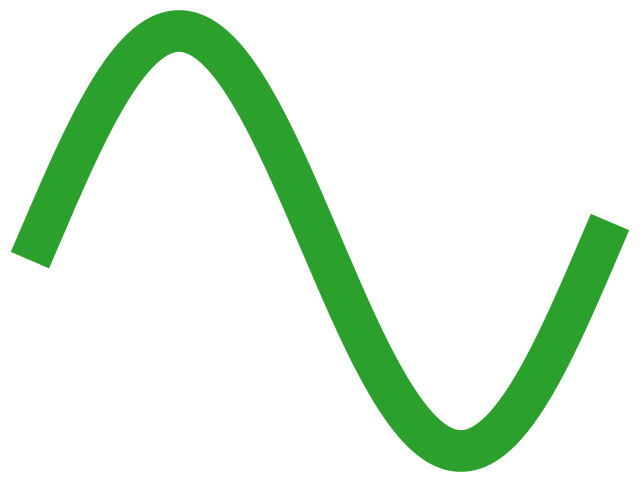

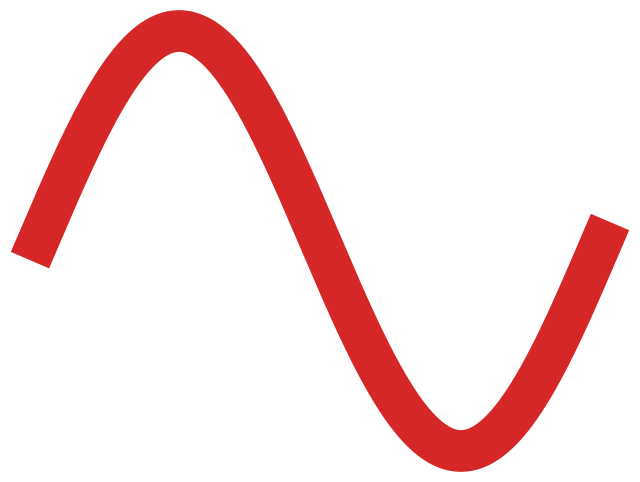

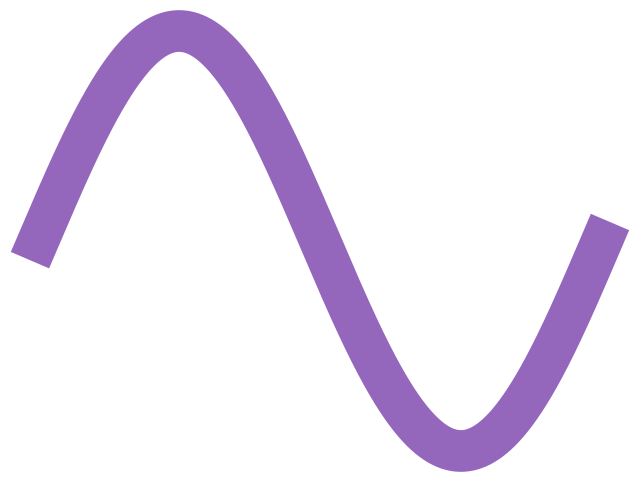

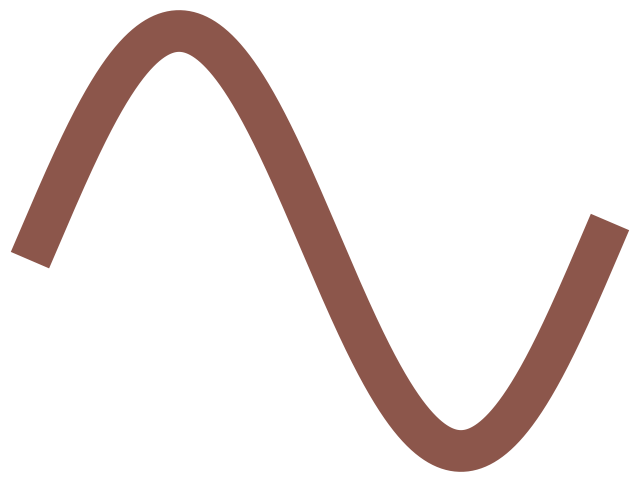

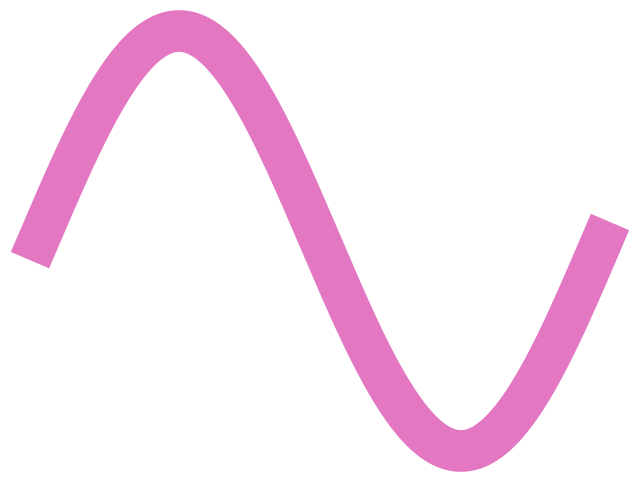

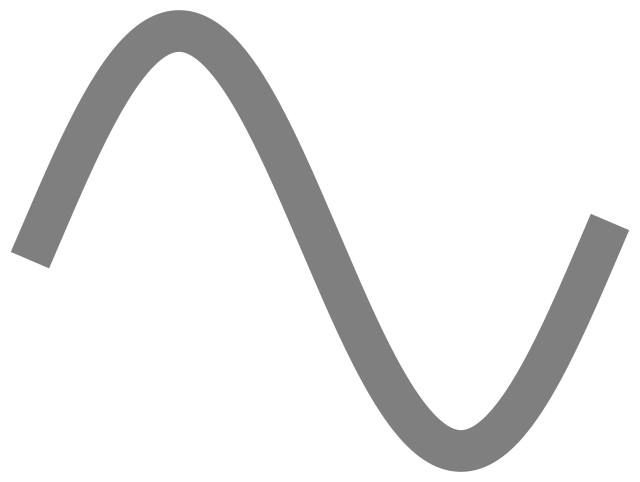

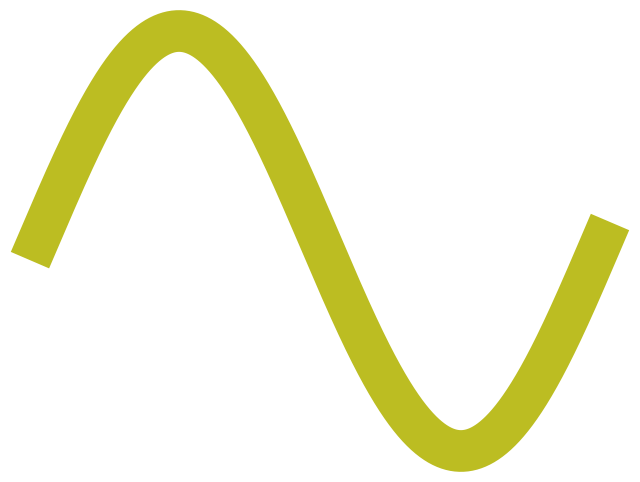

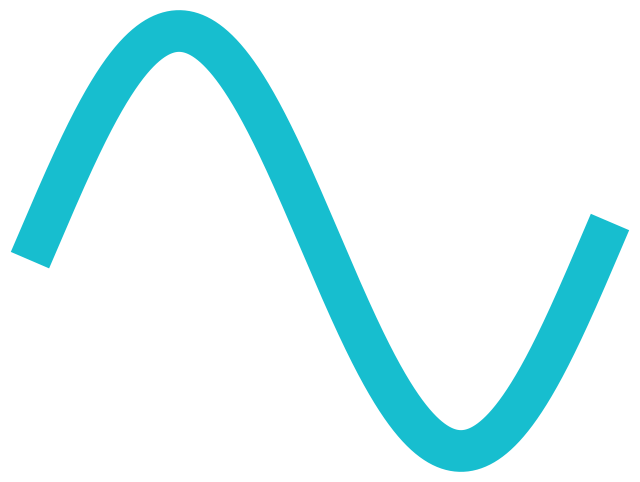

In [79]:
import matplotlib.colors as mcolors
Fs = 8000
f = 1
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
colors=list(mcolors.TABLEAU_COLORS)
for i in range(len(colors)):
    fig, ax=plt.subplots(figsize=(8,6))
    ax.plot(x, y, linewidth=30, color=colors[i])
    ax.axis('off')
    fig.savefig("./checkpoint2/results/figure/sine_c"+str(i)+".svg", transparent=True)
